In [74]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.base import clone
from sklearn.model_selection import KFold
import numpy as np


def show_conf_matrix(predicted, y):
    confusion_matr = confusion_matrix(y, predicted)
    confusion_matrix_display = ConfusionMatrixDisplay(confusion_matr)
    fig, ax = plt.subplots(figsize=(10, 10))
    confusion_matrix_display.plot(ax=ax)


def cross_val(classifier, X, y, k, shuffle=False):
    kf = KFold(n_splits=k, shuffle=shuffle)
    trained_classifier = []
    accuracy_list = []
    for train_index, test_index in kf.split(X):
        X_train_kfold, X_test_kfold = X[train_index], X[test_index]
        y_train_kfold, y_test_kfold = y[train_index], y[test_index]
        classifier_fold = clone(classifier)
        classifier_fold.fit(X_train_kfold, y_train_kfold)
        prediction = classifier_fold.predict(X_test_kfold)
        accuracy = accuracy_score(y_test_kfold, prediction)
        trained_classifier.append(classifier_fold)
        accuracy_list.append(accuracy)
    return trained_classifier, accuracy_list


def check_classifier(classifier, X_train, y_train, X_val, y_val):
    trained_classifier, accuracy_list = cross_val(classifier, X_train, y_train, 5)
    accuracy = 0.0
    for i in range(len(accuracy_list)):
        accuracy += accuracy_score(y_val, trained_classifier[i].predict(X_val))
    print(accuracy_list)
    accur = accuracy / len(accuracy_list)
    print("Accuracy %.4f" % accur)
    returned_classifier = trained_classifier[np.argmax(accuracy_list)]
    return returned_classifier


def show_result(clf, X_train, y_train, X_val, y_val):
    best_classifier = check_classifier(clf, X_train, y_train, X_val, y_val)
    prediction = best_classifier.predict(X_val)
    show_conf_matrix(y_val, prediction)
    return best_classifier

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
train_samples = 10000
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=train_samples, test_size=2000)

[0.9035, 0.889, 0.905, 0.9115, 0.904]
Accuracy 0.9098


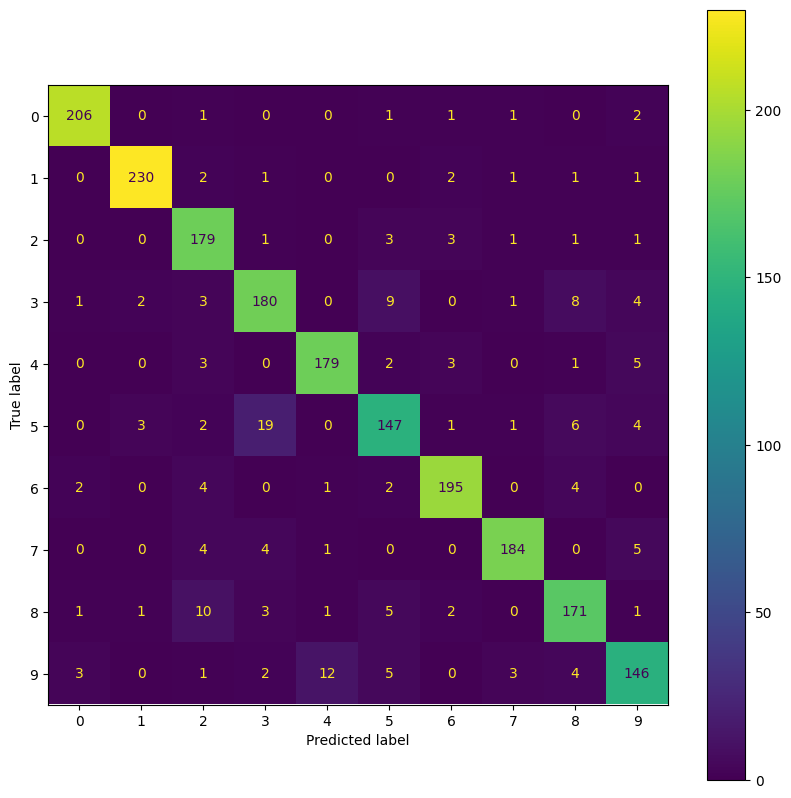

In [75]:
clf = show_result(LogisticRegression(C=0.01, penalty="l1", solver="saga", tol=0.1), train_x, train_y, test_x,
            test_y)

In [76]:
a = np.array(clf.coef_[:][6])
a = np.reshape(a, (28, 28))

[0.911, 0.889, 0.9, 0.91, 0.904]
Accuracy 0.9097


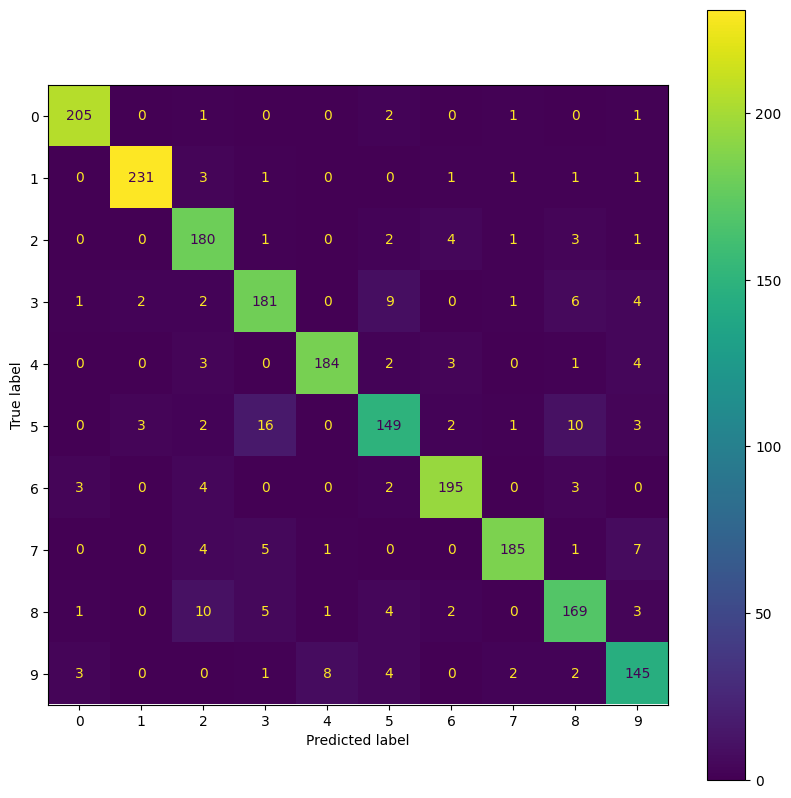

In [77]:
clf = show_result(LogisticRegression(C=0.01, penalty="l2", solver="saga", tol=0.1), train_x, train_y, test_x,
            test_y)

In [78]:
al2 = np.array(clf.coef_[:][6])
al2 = np.reshape(al2, (28, 28))

In [87]:
al2 = np.array(clf.coef_[:][6])
n = np.count_nonzero(al2)
print(n)

667


In [88]:
n = np.count_nonzero(a)
print(n)

514


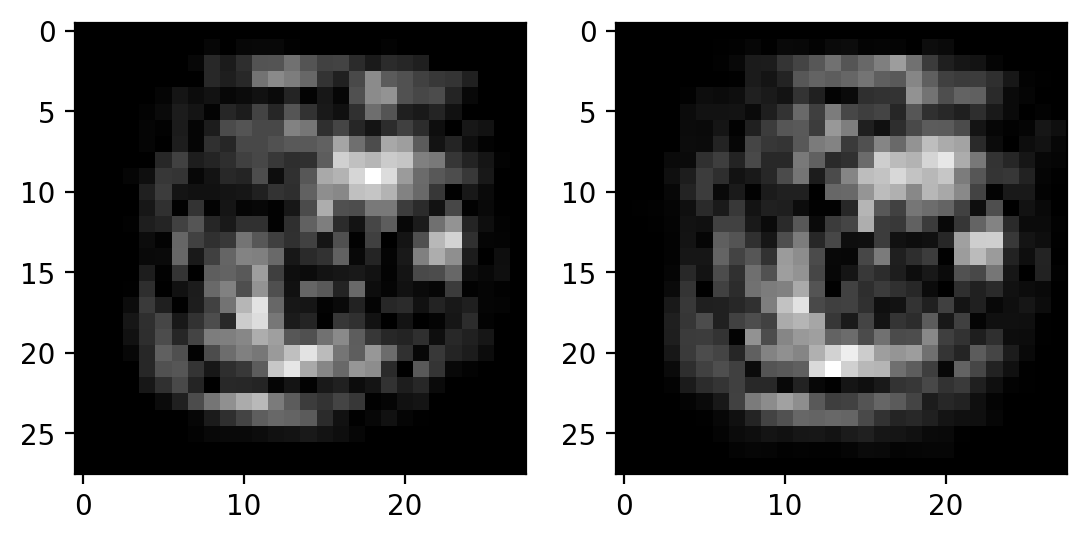

In [85]:
plt.rcParams['figure.dpi']=200
plt.subplot(1,2,1)
plt.imshow(np.abs(a), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(np.abs(al2), cmap='gray')